In [67]:
import pandas as pd
from google.colab import files
import joblib

In [34]:
# Subir archivos CSV
dataset_kaggle = files.upload()

Saving website_classification.csv to website_classification (4).csv


In [35]:
df = pd.read_csv(next(iter(dataset_kaggle)))
df.head(5)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [52]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [36]:
# Subir archivos CSV
dataset_uk = files.upload()

Saving classification.csv to classification.csv


In [88]:
df2 = pd.read_csv(next(iter(dataset_uk)))
df2.head(5)

,Primary Category,Secondary Category,Title,URL,Unnamed: 4
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/,NaN
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/,NaN
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/,NaN
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/,NaN
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/,NaN


In [89]:
df2 = df2.drop(columns=['Unnamed: 4', 'Primary Category'])
df2.head(5)

,Secondary Category,Title,URL
0,Architecture,68 Dean Street,http://www.sixty8.com/
1,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/
2,Architecture,Alexander Thomson Society,http://www.greekthomson.com/
3,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/
4,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [117]:
# Primer dataset
X1 = df['cleaned_website_text']  # Características
y1 = df['Category']               # Objetivo

In [118]:
# Dividir el primer dataset en conjunto de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(1126,)
(282,)
(1126,)
(282,)


In [119]:
# Crear un pipeline con TF-IDF y un clasificador Naive Bayes
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [120]:
# Entrenar el modelo
model1.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [121]:
# Predecir y evaluar
y1_pred = model1.predict(X1_test)
print("Resultados del primer modelo:")
print(classification_report(y1_test, y1_pred))

Resultados del primer modelo:
                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         4
             Business/Corporate       0.62      0.88      0.73        17
       Computers and Technology       0.82      0.47      0.60        19
                     E-Commerce       0.95      0.91      0.93        22
                      Education       0.81      0.93      0.86        27
                           Food       0.88      0.88      0.88        17
                         Forums       0.00      0.00      0.00         2
                          Games       1.00      0.82      0.90        22
             Health and Fitness       1.00      1.00      1.00        13
             Law and Government       1.00      0.91      0.95        23
                           News       0.68      0.94      0.79        18
                    Photography       0.95      0.90      0.92        20
Social Networking an

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [122]:
# Guardar el modelo de Category
joblib.dump(model1, 'model_category.pkl')

['model_category.pkl']

In [123]:
# Descargar el modelo de Category
files.download('model_category.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
from pathlib import Path

In [133]:
# Create a list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=1),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(),
}

In [145]:
# # Train the models
results = {}
for name, model in models.items():
    model1.fit(X1_train, y1_train)
    y_pred = model1.predict(X1_test)
    results[name] = metrics.accuracy_score(y1_test, y_pred)


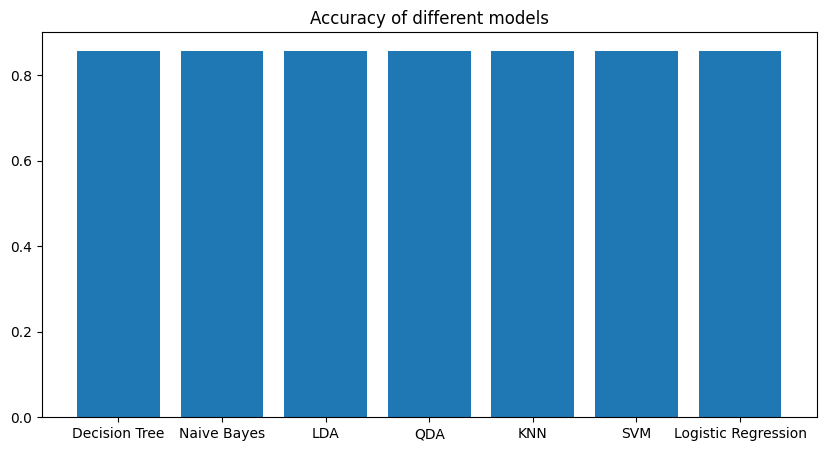

In [146]:
# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title("Accuracy of different models")
plt.show()

In [147]:
# Print results
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]:.2f}")


The best model is Decision Tree with an accuracy of 0.86


In [148]:
# Concatenar las características del segundo dataset
X2 = df2['Title'] # Características
y2 = df2['Secondary Category']    # Objetivo

In [125]:
# Dividir el segundo dataset en conjunto de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [149]:
# Crear un pipeline con TF-IDF y un clasificador Naive Bayes
model2 = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [150]:
# Entrenar el segundo modelo
model2.fit(X2_train, y2_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [151]:
# Predecir y evaluar
y2_pred = model2.predict(X2_test)
print("Resultados del segundo modelo:")
print(classification_report(y2_test, y2_pred))

Resultados del segundo modelo:
                            precision    recall  f1-score   support

              Architecture       0.83      0.18      0.29        28
            Art and Design       0.52      0.99      0.68        95
         Comedy and Humour       0.00      0.00      0.00         5
                     Dance       0.00      0.00      0.00         4
Family History / Genealogy       0.91      0.59      0.71        17
             Film / Cinema       0.00      0.00      0.00        15
                 Geography       1.00      0.04      0.07        28
                   History       0.00      0.00      0.00         8

                  accuracy                           0.55       200
                 macro avg       0.41      0.22      0.22       200
              weighted avg       0.58      0.55      0.43       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [129]:
# Guardar el modelo de Category
joblib.dump(model2, 'model_secondary_category.pkl')

['model_secondary_category.pkl']

In [130]:
# Descargar el modelo de Secondary Category
files.download('model_secondary_category.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
# # Train the models
results2 = {}
for name, model in models.items():
    model2.fit(X2_train, y2_train)
    y2_pred = model2.predict(X2_test)
    results2[name] = metrics.accuracy_score(y2_test, y2_pred)

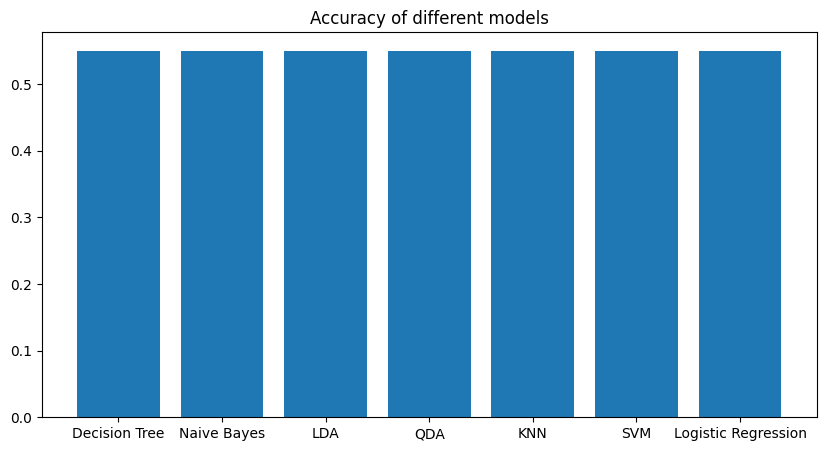

In [156]:
# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results2.keys(), results2.values())
plt.title("Accuracy of different models")
plt.show()

In [157]:
# Print results
best_model2 = max(results2, key=results2.get)
print(f"The best model is {best_model2} with an accuracy of {results2[best_model2]:.2f}")


The best model is Decision Tree with an accuracy of 0.55
